<a href="https://colab.research.google.com/github/Angel07as/VAE/blob/master/VAE_TRAINING_beli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>VAE-AUTOENCODER-HIPATHIA</center></h1>

### Importación de librerías

In [0]:
!pip install -q keras_tqdm

Importamos todas las librerías necesarias que serán utilizadas a lo largo de la experimentación.

In [3]:
##Keras y Tensorflow
import tensorflow as tf
import keras
from keras import backend as K
from keras.layers import (Input, InputLayer, Dense, Lambda, Layer, Add, Multiply, Activation,Dropout)
from keras.models import Model, Sequential
from keras.utils import plot_model
from keras.callbacks import Callback
from keras import metrics,optimizers
from datetime import datetime
from keras import models

##Visualizaciones y tratamiento datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn import manifold
from matplotlib.ticker import FormatStrFormatter
from keras.utils.vis_utils import model_to_dot, plot_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

##Optimización
from sklearn.preprocessing import StandardScaler
from keras.layers.normalization import BatchNormalization
from keras_tqdm import TQDMNotebookCallback
from IPython.display import SVG
import seaborn as sns
import os
import pickle
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


### ¿Versiones de Keras, TensorFlow y Python?

In [4]:
!ls

!ls

sample_data
sample_data


In [5]:
print("Versión de keras: {} / Versión de tensorFlow: {} ".format(keras.__version__,tf.__version__))

Versión de keras: 2.2.5 / Versión de tensorFlow: 1.15.0 


In [6]:
from platform import python_version

print(python_version())

3.6.9


In [0]:
%matplotlib inline

### Datos

Cargamos los datos 

In [16]:
# Isa: INTENTO DE COGER DATOS DEL GOOGLE DRIVE, pero no me funciona
#from google.colab import drive
#drive.mount('/content/drive/Colab Notebooks/')
# Isa: Así que lo cojo de dropbox
!mkdir data
!wget -O data/GenesvsSample_counts_log2TMM_Hipathia-pathvals.feather https://www.dropbox.com/s/l5y96rdp553s3z7/GenesvsSample_counts_log2TMM_Hipathia-pathvals.feather?dl=0

mkdir: cannot create directory ‘data’: File exists
--2020-03-09 16:19:26--  https://www.dropbox.com/s/l5y96rdp553s3z7/GenesvsSample_counts_log2TMM_Hipathia-pathvals.feather?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/l5y96rdp553s3z7/GenesvsSample_counts_log2TMM_Hipathia-pathvals.feather [following]
--2020-03-09 16:19:27--  https://www.dropbox.com/s/raw/l5y96rdp553s3z7/GenesvsSample_counts_log2TMM_Hipathia-pathvals.feather
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucae9b3af35793a07ca1c9607d7a.dl.dropboxusercontent.com/cd/0/inline/AznoMYGD98yh_jYMpehzcSFZxbz69CXlxyCPVjJyfCIP45vDxU_JUo_gncCwpRToMlsoe7HJwCBuv6TROhGfjLUIKp9cGBzgEAZeh4fLX87L51fRK9cCAZ6hQuMMh-0A-3g/file# [following]
--2020-03-09 16:19:27--  http

In [17]:
# Isa: no veo contenido
print("Contenido de datos")
!ls
print('Entramos en directorio')
!cd data
print('Contenido del directorio')
!ls
print('Salimos del directorio')
!cd ..

Contenido de datos
data  sample_data
Entramos en directorio
Contenido del directorio
data  sample_data
Salimos del directorio


In [34]:


import pandas as pd
#hipathia = pd.read_feather('GenesvsSample_counts_log2TMM_Hipathia-pathvals.feather')
hipathia = pd.read_feather('data/GenesvsSample_counts_log2TMM_Hipathia-pathvals.feather')
print("Dataframe con los datos de hiPathia:\n\nFilas: {} \nColumnas: {}".format(hipathia.shape[0],hipathia.shape[1]))
hipathia.head(2)

Dataframe con los datos de hiPathia:

Filas: 11093 
Columnas: 1869


,P-hsa03320-37,P-hsa03320-61,P-hsa03320-46,P-hsa03320-57,P-hsa03320-64,P-hsa03320-47,P-hsa03320-65,P-hsa03320-55,P-hsa03320-56,P-hsa03320-33,P-hsa03320-58,P-hsa03320-59,P-hsa03320-63,P-hsa03320-44,P-hsa03320-36,P-hsa03320-30,P-hsa03320-28,P-hsa03320-25,P-hsa03320-21,P-hsa03320-20,P-hsa03320-42,P-hsa03320-27,P-hsa03320-26,P-hsa03320-22,P-hsa03320-41,P-hsa03320-66,P-hsa03320-60,P-hsa03320-31,P-hsa03320-29,P-hsa03320-10,P-hsa03320-40,P-hsa03320-53,P-hsa03320-38,P-hsa03320-39,P-hsa03320-9,P-hsa03320-7,P-hsa03320-8,P-hsa03320-32,P-hsa03320-23,P-hsa03320-43,...,P-hsa05222-40,P-hsa05222-36,P-hsa05222-35,P-hsa05222-44,P-hsa05223-37,P-hsa05223-29 34,P-hsa05223-28,P-hsa05223-22,P-hsa05223-23,P-hsa05223-21,P-hsa05223-9,P-hsa05223-8,P-hsa05223-7,P-hsa05223-14,P-hsa05223-24,P-hsa05231-38,P-hsa05231-39,P-hsa05231-34,P-hsa05231-18,P-hsa05231-21,P-hsa05231-59,P-hsa05231-60,P-hsa05231-48,P-hsa05231-50,P-hsa05231-17,P-hsa05321-83,P-hsa05321-46,P-hsa05321-19,P-hsa05321-92,P-hsa05321-94,P-hsa05321-95,P-hsa05321-122,P-hsa05321-123,P-hsa05321-55,P-hsa05321-74,P-hsa05321-81,P-hsa05321-138,P-hsa05321-75,P-hsa05321-152,sample_name
0,2.364967e-01,0.032368,0.068466,5.754841e-03,6.951022e-17,0.131454,0.118687,0.348050,0.116461,0.005755,0.074040,0.254563,0.194196,5.561792e-02,0.273181,0.142482,0.338346,0.163441,0.171946,0.189984,0.322144,0.340417,0.129145,0.150646,0.350108,1.578540e-16,0.089953,0.106506,0.090912,0.140722,0.072836,9.504732e-17,0.185056,0.174206,0.210522,0.141096,0.182201,0.115931,0.045677,0.090085,...,0.000349,0.000293,0.000079,0.186787,0.032584,0.164425,0.217793,0.094621,0.081329,0.085426,0.059417,0.051071,0.053644,0.060140,0.060479,0.196447,0.242678,0.296153,0.401823,0.000132,0.037734,0.001591,0.183821,0.222998,0.221941,2.475749e-19,1.376092e-02,4.894980e-02,3.066396e-03,8.851310e-04,0.129946,0.000737,8.903472e-18,0.008088,7.308487e-19,0.000149,9.031419e-03,0.000646,0.076600,TCGA-G2-AA3B-01A-11R-A39I-07
1,7.154421e-17,0.033658,0.007176,7.154421e-17,7.154421e-17,0.113025,0.162487,0.302848,0.189650,0.012651,0.024001,0.150882,0.150353,7.154421e-17,0.230548,0.222946,0.249482,0.111342,0.157598,0.160753,0.283968,0.337159,0.122755,0.142956,0.156001,1.417829e-16,0.120437,0.094515,0.060488,0.019408,0.057776,5.178015e-17,0.105989,0.019408,0.096945,0.044847,0.071244,0.154956,0.057823,0.149944,...,0.000144,0.000076,0.000148,0.134960,0.037866,0.244456,0.170729,0.106312,0.097633,0.121465,0.058763,0.053965,0.067138,0.072402,0.056523,0.162417,0.149130,0.260448,0.280737,0.000108,0.031912,0.002161,0.184838,0.202539,0.174129,2.112480e-19,1.597977e-18,4.487455e-17,6.812313e-19,6.812313e-19,0.162169,0.002530,1.062990e-03,0.019685,7.357476e-05,0.000130,9.343985e-18,0.000143,0.047016,TCGA-RW-A688-01A-11R-A35K-07


In [90]:
# Isa: inspeccionamos los datos
print(hipathia.shape)
print(hipathia.columns)
print(hipathia.index)
print(hipathia)

# hipathia['sample_name'] Isa: da error ¿por qué?


(11093, 1868)
Index(['P-hsa03320-37', 'P-hsa03320-61', 'P-hsa03320-46', 'P-hsa03320-57',
       'P-hsa03320-64', 'P-hsa03320-47', 'P-hsa03320-65', 'P-hsa03320-55',
       'P-hsa03320-56', 'P-hsa03320-33',
       ...
       'P-hsa05321-94', 'P-hsa05321-95', 'P-hsa05321-122', 'P-hsa05321-123',
       'P-hsa05321-55', 'P-hsa05321-74', 'P-hsa05321-81', 'P-hsa05321-138',
       'P-hsa05321-75', 'P-hsa05321-152'],
      dtype='object', length=1868)
Index(['TCGA-G2-AA3B-01A-11R-A39I-07', 'TCGA-RW-A688-01A-11R-A35K-07',
       'TCGA-A8-A07U-01A-11R-A034-07', 'TCGA-56-6546-01A-11R-1820-07',
       'TCGA-A3-3308-01A-02R-1325-07', 'TCGA-80-5608-01A-31R-1949-07',
       'TCGA-E2-A15E-06A-11R-A12D-07', 'TCGA-FU-A3HZ-01A-11R-A213-07',
       'TCGA-D8-A1JM-01A-11R-A13Q-07', 'TCGA-AN-A0AT-01A-11R-A034-07',
       ...
       'TCGA-99-8032-01A-11R-2241-07', 'TCGA-L5-A8NL-01A-12R-A37I-31',
       'TCGA-QS-A5YR-01A-31R-A31O-07', 'TCGA-86-8281-01A-11R-2287-07',
       'TCGA-K4-AAQO-01A-11R-A38B-07', 'TCGA-

Dividimos en train y test para la validación. 

In [93]:
data = {'Country': ['Belgium',  'India',  'Brazil'],

'Capital': ['Brussels',  'New Delhi',  'Brasilia'],

'Population': [11190846, 1303171035, 207847528]}
df = pd.DataFrame(data,columns=['Country',  'Capital',  'Population'])
print(df)
print('--- df')
print(type(df['Country']))
print(df.index)
print(df.columns)


print("--- HIPATHIA")
hipathia['sample_name']

# Split 10% test set randomly
test_set_percent = 0.1
#hipathia.index= hipathia['sample_name']
#hipathia = hipathia.drop('sample_name',axis=1)
#hipathia_test = hipathia.sample(frac=test_set_percent)
#hipathia_train = hipathia.drop(hipathia_test.index)

   Country    Capital  Population
0  Belgium   Brussels    11190846
1    India  New Delhi  1303171035
2   Brazil   Brasilia   207847528
--- df
<class 'pandas.core.series.Series'>
RangeIndex(start=0, stop=3, step=1)
Index(['Country', 'Capital', 'Population'], dtype='object')
--- HIPATHIA


KeyError: ignored

### Inicializamos variables e hiperparámetros

In [0]:
original_dim=hipathia_train.shape[1]
latent_dim = 100

batch_size=50
epochs = 50
learning_rate=0.0005

beta = K.variable(0)
kappa = 1
epsilon_std = 1.0

Instructions for updating:
Colocations handled automatically by placer.


Implementamos el decoder y el encoder por separados

<h2><center>Encoder</center></h2>

In [0]:
##Creamos la capa de entrada
inputs = Input(shape=(original_dim,),name='encoder_input')

##Creamos capa intermedia
x_encoder = Dense(latent_dim,kernel_initializer='glorot_uniform')(inputs)
x_encoder_log = Dense(latent_dim,kernel_initializer='glorot_uniform')(inputs)

##Creamos dos capas de salida,media y log_desviacion(se usa en lugar de la estándar)
z_mean_dense_batchnorm = BatchNormalization()(x_encoder)
log_desviacion_dense_batchnorm = BatchNormalization()(x_encoder_log)
z_mean_encoded = Activation('relu')(z_mean_dense_batchnorm)
log_desviacion = Activation('relu')(log_desviacion_dense_batchnorm)

<h2><center>Decoder</center></h2>

In [0]:
##Creamos capa de entrada del decodificador
latent_vector = Input(shape=(latent_dim,), name='latent_vector')
outputs = Dense(original_dim,kernel_initializer='glorot_uniform',activation='sigmoid')(latent_vector)

### Sampler y CustomVariationalLayer

In [0]:
def sampler(args):
    z_mean, z_log = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # mean and log of variance of Q(z|X)
    # we sample from the standard normal a matrix of batch_size * latent_size (taking into account minibatches)
    epsilon = K.random_normal(shape=(batch,dim))# by default, random_normal has mean=0 and std=1.0
    # sampling from Z~N(μ, σ^2) is the same as sampling from μ + σX, X~N(0,1)
    return z_mean + K.exp(0.5 * z_log) * epsilon

z = Lambda(sampler,output_shape=(latent_dim, ))([z_mean_encoded, log_desviacion])

class CustomVariationalLayer(Layer):
    """
    Define a custom layer that learns and performs the training
    This function is borrowed from:
    https://github.com/fchollet/keras/blob/master/examples/variational_autoencoder.py
    """
    def __init__(self, **kwargs):
        # https://keras.io/layers/writing-your-own-keras-layers/
        self.is_placeholder = True
        super(CustomVariationalLayer, self).__init__(**kwargs)

    def vae_loss(self, x_input, x_decoded):
        reconstruction_loss = original_dim * metrics.binary_crossentropy(x_input, x_decoded)
        kl_loss = - 0.5 * K.sum(1 + log_desviacion - K.square(z_mean_encoded) - 
                                K.exp(log_desviacion), axis=-1)
        return K.mean(reconstruction_loss + (K.get_value(beta) * kl_loss))

    def call(self, inputs):
        x = inputs[0]
        x_decoded = inputs[1]
        loss = self.vae_loss(x, x_decoded)
        self.add_loss(loss, inputs=inputs)
        # We won't actually use the output.
        return x

### WarmUpCallBack

In [0]:
class WarmUpCallback(Callback):
    def __init__(self, beta, kappa):
        self.beta = beta
        self.kappa = kappa
    # Behavior on each epoch
    def on_epoch_end(self, epoch, logs={}):
        if K.get_value(self.beta) <= 1:
            K.set_value(self.beta, K.get_value(self.beta) + self.kappa)
    def on_epoch_end(self,epoch,logs=None):
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2)

In [0]:
np.random.seed(123)

<h2><center>Compilacion del modelo</center></h2>

In [0]:
##Instanciamos el optimizador
adam = optimizers.Adam(lr=learning_rate)

##Instanciamos el encoder
encoder = Model(inputs,[z_mean_encoded,log_desviacion,z],name='encoder')
encoder.save('encoder.h5')
print('Encoder\n')
encoder.summary()
##Instanciamos el decoder
decoder = Model(latent_vector,outputs,name='decoder')
decoder.save('decoder.h5')
print('Decoder\n')
decoder.summary()

outputs_final= decoder(encoder(inputs)[2])

##Creamos modelo final con la capa 'CustomVariationalLayer'
vae_layer = CustomVariationalLayer()([inputs, outputs_final])
vae = Model(inputs,vae_layer)
vae.compile(optimizer=adam, loss=None, loss_weights=[beta],metrics=['mae'])
print('VAE\n')
vae.summary()

Encoder

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 1868)         0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 100)          186900      encoder_input[0][0]              
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 100)          186900      encoder_input[0][0]              
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 100)          400         dense_1[0][0]                    
___________________________________________________________________________________

In [0]:
# Visualize the connections of the custom VAE model
plot_model(vae,show_shapes=True, to_file='modeloVAE.png')

<h2><center>Entrenamiento</center></h2>

In [0]:
%%time
hist = vae.fit(np.array(hipathia_train),
               shuffle=True,
               epochs=epochs,
               verbose=0,
               batch_size=batch_size,
               validation_data=(np.array(hipathia_test), None),
               callbacks=[WarmUpCallback(beta, kappa),
                          TQDMNotebookCallback(leave_inner=True, leave_outer=True)])

Instructions for updating:
Use tf.cast instead.



Wall time: 3min 25s


Text(0, 0.5, 'VAE Loss')

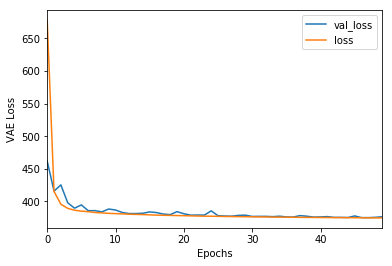

In [0]:
# Visualize training performance
history_df = pd.DataFrame(hist.history)
ax = history_df.plot()
ax.set_xlabel('Epochs')
ax.set_ylabel('VAE Loss')

### Sanitiy check - Evaluación funcionamiento del modelo

#### Datos para clasificadores

In [0]:
encoded_hipathia ,_,encoded_hipathia_z = encoder.predict_on_batch(hipathia_train)
encoded_hipathia_test ,_,encoded_hipathia_test_z= encoder.predict_on_batch(hipathia_test)#Solo usaremos el test
encoded_hipathia = pd.DataFrame(encoded_hipathia, index=hipathia_train.index) ##Lo pasamos a dataframe para poder tratarlo
encoded_hipathia_test = pd.DataFrame(encoded_hipathia_test, index=hipathia_train_test.index)
encoded_hipathia_z = pd.DataFrame(encoded_hipathia_z, index=hipathia_train.index) ##Lo pasamos a dataframe para poder tratarlo
encoded_hipathia.head(2)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
sample_name,,,,,,,,,,,,,,,,,,,,,
TCGA-RW-A688-01A-11R-A35K-07,-0.0,5.526635,-0.000000,2.351792,-0.0,1.743103,-0.0,-0.000000,-0.0,1.471102,...,5.360454,0.926256,0.278172,-0.000000,-0.000000,2.777038,5.642735,2.616288,-0.000000,5.84947
TCGA-A8-A07U-01A-11R-A034-07,-0.0,0.043674,1.506951,-0.000000,-0.0,0.651215,-0.0,2.418453,-0.0,3.028760,...,1.989354,0.761050,4.523746,0.976435,1.926794,1.533072,-0.000000,-0.000000,1.127234,-0.00000


Guardamos datos para usarlso con los clasificadores 

In [0]:
#Encoded_train
encoded_train = open('encoded_train', 'wb')
pickle.dump(encoded_hipathia, encoded_train)
encoded_train.close()

In [0]:
#Encoded_test
encoded_test = open('encoded_test', 'wb')
pickle.dump(encoded_hipathia_test, encoded_test)
encoded_test.close()

In [0]:
# Vemos cuáles son los nodos más y menos activos
sum_node_activity = encoded_hipathia.sum(axis=0).sort_values(ascending=False)

# 10 nodos más activos
print(sum_node_activity.head(10))

# 10 nodos menos activos
sum_node_activity.tail(10)

40    19466.101562
80    18022.656250
12    17952.552734
59    17691.816406
70    17681.832031
41    17627.332031
39    17546.244141
79    17429.611328
97    17372.494141
81    16675.394531
dtype: float32


7     9212.862305
91    8966.675781
4     8928.172852
8     8777.397461
10    8675.592773
22    8607.458984
45    8390.353516
53    8305.222656
24    7605.708984
43    7434.774902
dtype: float32

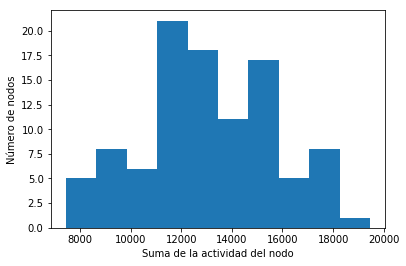

In [0]:
# Histograma de la activación de los nodos en el espacio latente (100)
sum_node_activity.hist(grid=False)
plt.xlabel('Suma de la actividad del nodo')
plt.ylabel('Número de nodos');

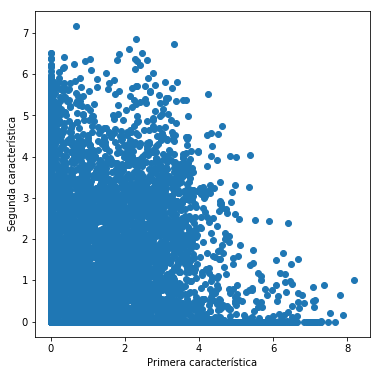

In [0]:
# Ejemplo de la activación de los 2 primeros nodos en el espacio latente.
plt.figure(figsize=(6, 6))
plt.scatter(encoded_hipathia.iloc[:, 1], encoded_hipathia.iloc[:, 2])
plt.xlabel('Primera característica')
plt.ylabel('Segunda característica');

In [0]:
# Vemos como de bien el modelo reconstruye los datos. 
input_hipathia_reconstruct = decoder.predict(np.array(encoded_hipathia_z))
input_hipathia_reconstruct = pd.DataFrame(input_hipathia_reconstruct, index=hipathia_train.index,
                                        columns=hipathia_train.columns)
input_hipathia_reconstruct.head(2)

,P-hsa03320-37,P-hsa03320-61,P-hsa03320-46,P-hsa03320-57,P-hsa03320-64,P-hsa03320-47,P-hsa03320-65,P-hsa03320-55,P-hsa03320-56,P-hsa03320-33,...,P-hsa05321-94,P-hsa05321-95,P-hsa05321-122,P-hsa05321-123,P-hsa05321-55,P-hsa05321-74,P-hsa05321-81,P-hsa05321-138,P-hsa05321-75,P-hsa05321-152
sample_name,,,,,,,,,,,,,,,,,,,,,
TCGA-RW-A688-01A-11R-A35K-07,0.011479,0.073870,0.017291,0.008864,0.013551,0.135843,0.128749,0.268410,0.187358,0.017299,...,0.000005,0.183039,0.001919,0.002206,0.018598,0.000057,0.000022,0.000396,0.000331,0.056699
TCGA-A8-A07U-01A-11R-A034-07,0.084862,0.039873,0.014067,0.005103,0.006460,0.178501,0.129948,0.327429,0.176937,0.026682,...,0.000116,0.202128,0.000881,0.000883,0.014306,0.000099,0.000146,0.011328,0.002237,0.169910


In [0]:
reconstruction_fidelity = hipathia - input_hipathia_reconstruct

hipathia_mean = reconstruction_fidelity.mean(axis=0)
hipathia_abssum = reconstruction_fidelity.abs().sum(axis=0).divide(hipathia.shape[0])
hipathia_summary = pd.DataFrame([hipathia_mean, hipathia_abssum], index=['Media-Datos hipathia', 'Valor-absoluto-suma hipathia']).T
hipathia_summary.sort_values(by='Valor-absoluto-suma hipathia', ascending=False).head()

,Media-Datos hipathia,Valor-absoluto-suma hipathia
P-hsa04930-7,-0.038120,0.062675
P-hsa04610-7,-0.009819,0.053170
P-hsa04970-39,-0.030619,0.050821
P-hsa04750-62,-0.010876,0.048785
P-hsa04924-31,-0.012264,0.048468


### Tratamiento datos previo a visualizaciones

In [0]:
whole_hipathia= pd.read_feather('Datos\wholeTCGA_clinicaldata_curated.feather')
tumor_tissue = set(whole_hipathia['tumor_tissue_site'])
tumor_tissue = list(tumor_tissue)
whole_hipathia.index = whole_hipathia['bcr_patient_barcode']

In [0]:
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
ifont = {'fontname':'Impact'}
rfont = {'fontname':'Rockwell'}


In [0]:
indice_tsn = list(encoded_hipathia.index)
indice_tsn = [x[:12] for x in indice_tsn]
indice_tsn[1]

'TCGA-A8-A07U'

### Estudio espacio latente a través del t-SNE

### t-SNE - Encoded features

In [0]:
def tiempo():
    instanteInicial = datetime.now()
    instanteFinal = datetime.now()
    tiempo = instanteFinal - instanteInicial
    return tiempo

In [0]:
instanteInicial = datetime.now()
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, perplexity=20,
                     learning_rate=300, n_iter=400)
tsne_out = tsne.fit_transform(encoded_hipathia)
tsne_out = pd.DataFrame(tsne_out, columns=['1', '2'])
tsne_out.index = indice_tsn
tsne_out.index.name = 'tcga_id'
instanteFinal = datetime.now()
tiempo = instanteFinal - instanteInicial
print(tiempo)

0:02:08.711009


In [0]:
tsne_vae=tsne_out
whole_hipathia_tissue = whole_hipathia['tumor_tissue_site']
palette_order = tumor_tissue.copy()
tsne_vae_df = pd.merge(tsne_vae, whole_hipathia, left_index=True, right_index=True, how='left')
tsne_vae_df.iloc[:2,:]

,1,2,bcr_patient_barcode,additional_studies,tumor_tissue_site,histological_type,other_dx,gender,vital_status,days_to_birth,...,V536,V538,V542,V545,V546,V547,V553,V554,V561,V573
TCGA-02-0047,26.293808,-3.430333,TCGA-02-0047,None,Brain,Untreated primary (de novo) GBM,None,MALE,Dead,-28759,...,None,None,None,None,None,None,None,None,None,None
TCGA-02-0055,22.536154,-1.455084,TCGA-02-0055,None,Brain,Untreated primary (de novo) GBM,None,FEMALE,Dead,-22798,...,None,None,None,None,None,None,None,None,None,None


Text(0.5, 0.98, 'T-SNE-ENCODED')

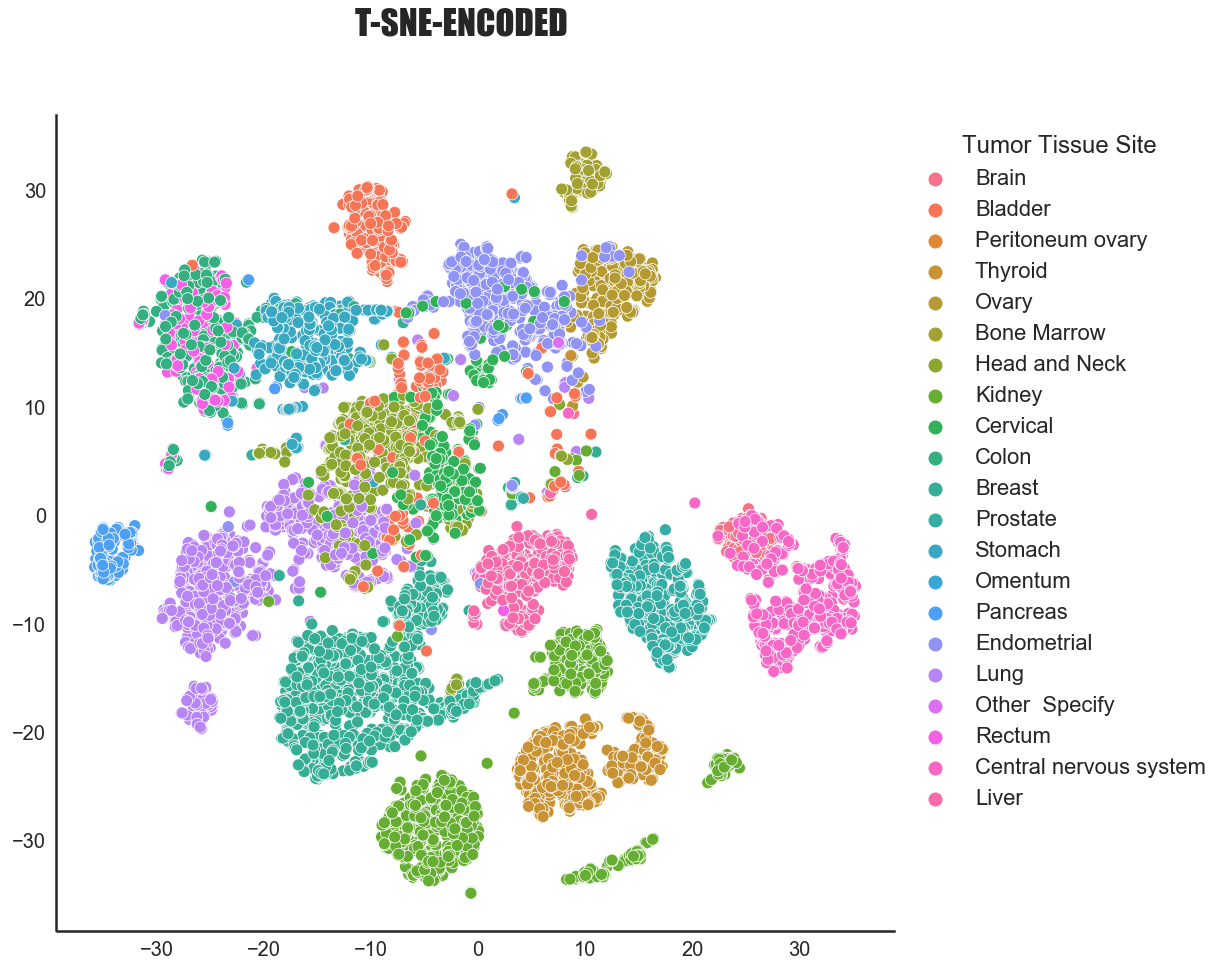

In [0]:
f, ax = plt.subplots(figsize=(15, 15))
sns.set()
sns.set_style("white")
sns.despine(f,offset=1)  
sns.set_palette('bright')
sns.set_context("poster",rc={"lines.linewidth": 2.0}) 
sns.scatterplot(x="1", y="2",hue="tumor_tissue_site",hue_order=palette_order,data=tsne_vae_df,ax=ax)#hue_order=palette_order
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], title="Tumor Tissue Site",bbox_to_anchor=(1.0, 1.0), loc='best', ncol=1, fancybox=True,frameon=False)
##De esta manera controlamos tamaño de los números en los ejes
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
##Cambiamos el nombre de los ejes
plt.xlabel(" ",size=1)
plt.ylabel(" ",size=1)
plt.suptitle("T-SNE-ENCODED",**ifont,size=35)

### t-SNE - Encoded features (vector z)

Aqui usamos el vector z generado en el espacio latente. Usaremos también todas la variables clínicas cargadas en el anterior punto conocido como whole_hipathia.

In [0]:
instanteInicial = datetime.now()
tsne_n = manifold.TSNE(n_components=2, init='pca', random_state=0, perplexity=20,
                     learning_rate=300, n_iter=400)
tsne_out_n = tsne.fit_transform(encoded_hipathia_z)
tsne_out_n = pd.DataFrame(tsne_out_n, columns=['1', '2'])
tsne_out_n.index = indice_tsn
tsne_out_n.index.name = 'tcga_id'
instanteFinal = datetime.now()
tiempo = instanteFinal - instanteInicial
print(tiempo)

0:02:04.483735


In [0]:
tsne_vae_n=tsne_out_n
whole_hipathia_tissue = whole_hipathia['tumor_tissue_site']
tsne_vae_hn = pd.merge(tsne_vae_n, whole_hipathia, right_index=True,left_index=True)
tsne_vae_hn.iloc[:2,:]

,1,2,bcr_patient_barcode,additional_studies,tumor_tissue_site,histological_type,other_dx,gender,vital_status,days_to_birth,...,V536,V538,V542,V545,V546,V547,V553,V554,V561,V573
TCGA-02-0047,22.727064,-12.736952,TCGA-02-0047,None,Brain,Untreated primary (de novo) GBM,None,MALE,Dead,-28759,...,None,None,None,None,None,None,None,None,None,None
TCGA-02-0055,21.511768,-15.360620,TCGA-02-0055,None,Brain,Untreated primary (de novo) GBM,None,FEMALE,Dead,-22798,...,None,None,None,None,None,None,None,None,None,None


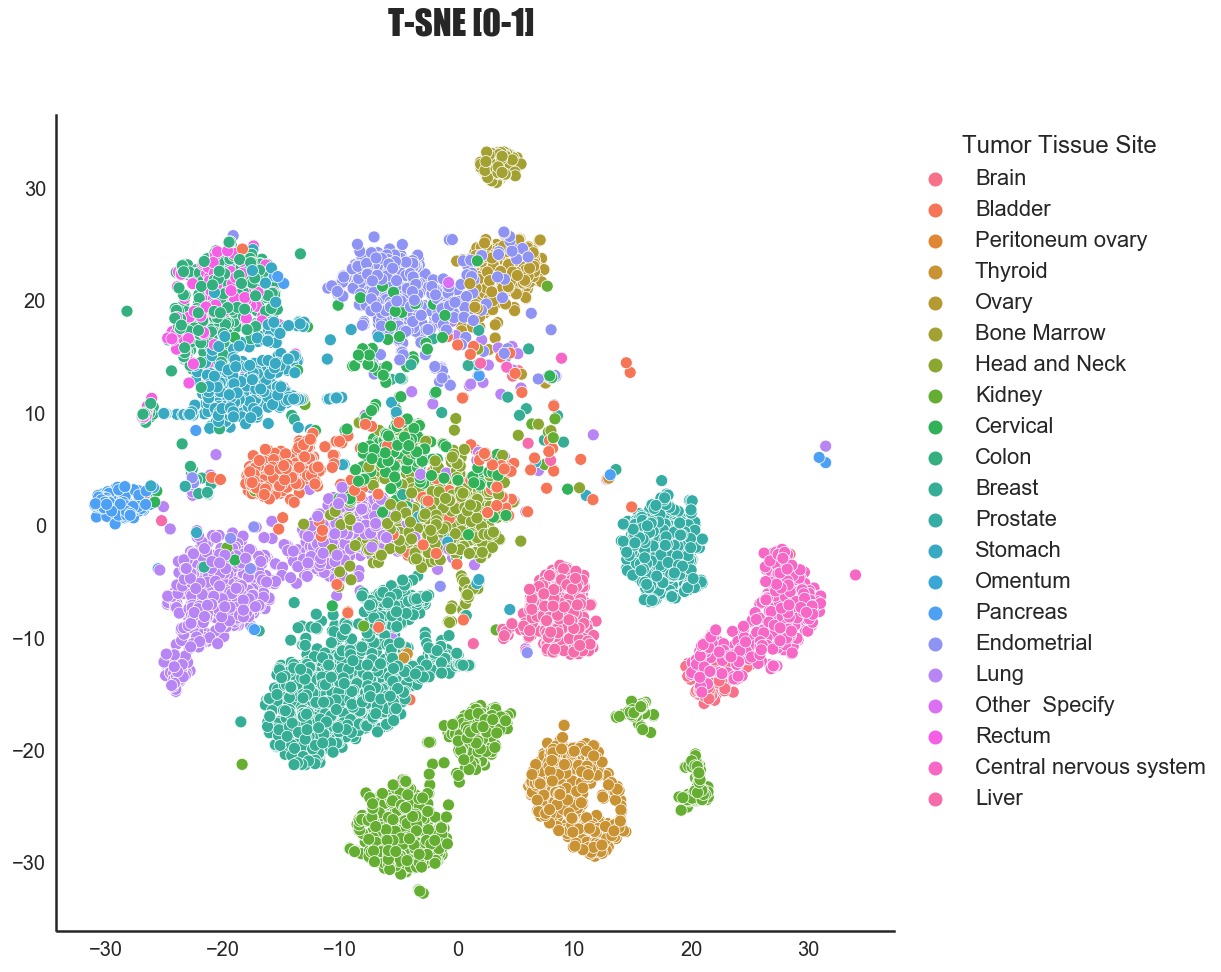

In [0]:
f, ax = plt.subplots(figsize=(15, 15))
sns.set()
sns.set_style("white")
sns.despine(f,offset=1)  
sns.set_palette('bright')
sns.set_context("poster",rc={"lines.linewidth": 2.0})
sns.scatterplot(x="1", y="2",hue='tumor_tissue_site',hue_order=palette_order,data=tsne_vae_hn,ax=ax)
##Quitamos nombre de la leyenda, ya que se generaba por defecto mediante el código de arriba
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], title="Tumor Tissue Site",bbox_to_anchor=(1.0, 1.0), loc='best', ncol=1, fancybox=True,frameon=False)
##De esta manera controlamos tamaño de los números en los ejes
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
##Cambiamos el nombre de los ejes
plt.xlabel(" ",size=1)
plt.ylabel(" ",size=1)
plt.suptitle("T-SNE [0-1]",**ifont,size=35)
plt.savefig("T_SNE_0_1.png")

### Heatmap

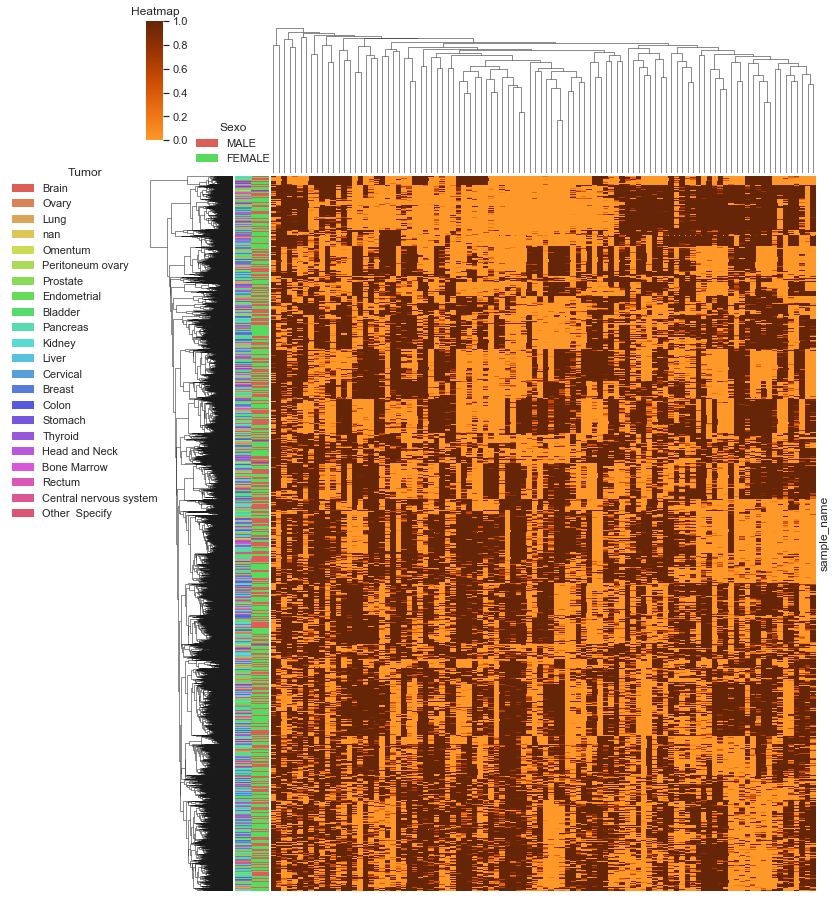

In [0]:
### Seleccionamos las 100 características el ejemplo
clinical_sample= encoded_hipathia
sample_type_vector = tsne_vae_df['tumor_tissue_site']
sexo = tsne_vae_df['gender']

lut1 = dict(zip(sample_type_vector.unique(), sns.hls_palette(len(sample_type_vector.unique()))))
row_colors1 = sample_type_vector.map(lut1)

#Create additional row_colors here
lut2 = dict(zip(sexo.unique(), sns.hls_palette(len(set(sexo)))))
row_colors2 = sexo.map(lut2)

sns.set()
heatmap = sns.clustermap(clinical_sample, center=0, cmap='YlOrBr', row_colors=[row_colors1, row_colors2],xticklabels=False,yticklabels=False,linewidths=0, figsize=(12, 16),vmin=0,vmax=1)

for tumor in sample_type_vector.unique():
    heatmap.ax_col_dendrogram.bar(0, 0, color=lut1[tumor], label=tumor, linewidth=0)

l1 = heatmap.ax_col_dendrogram.legend(title='Tumor', loc="right", ncol=1, bbox_to_anchor=(0.15, 0.60), bbox_transform=plt.gcf().transFigure,frameon=False)
plt.title('Heatmap')

for sex in sexo.unique()[0:2]:
    heatmap.ax_row_dendrogram.bar(0, 0, color=lut2[sex], label=sex, linewidth=0)

l2 = heatmap.ax_row_dendrogram.legend(title='Sexo', loc="upper right", ncol=1, bbox_to_anchor=(0.28, 0.80), bbox_transform=plt.gcf().transFigure,frameon=False)

plt.show()


### Error por tumor y sexo

Estudiamos el error cometido por el autoencoder por tipo de tumor y según el sexo.

In [0]:
X_train_pred = pd.DataFrame(vae.predict_on_batch(hipathia_train))
X_val_pred = pd.DataFrame(vae.predict_on_batch(hipathia_test))

In [0]:
X_train_pred.shape

(9984, 1868)

In [0]:
tumor_tissue_site = ['Bladder','Bone Marrow', 'Brain', 'Breast','Central nervous system', 'Cervical', 'Colon', 'Endometrial','Head and Neck',
                     'Kidney', 'Liver','Lung','Omentum','Ovary','Pancreas','Prostate','Rectum','Stomach','Thyroid']

### Train

In [0]:
hipathia_train.head(2)

,P-hsa03320-37,P-hsa03320-61,P-hsa03320-46,P-hsa03320-57,P-hsa03320-64,P-hsa03320-47,P-hsa03320-65,P-hsa03320-55,P-hsa03320-56,P-hsa03320-33,...,P-hsa05321-94,P-hsa05321-95,P-hsa05321-122,P-hsa05321-123,P-hsa05321-55,P-hsa05321-74,P-hsa05321-81,P-hsa05321-138,P-hsa05321-75,P-hsa05321-152
sample_name,,,,,,,,,,,,,,,,,,,,,
TCGA-RW-A688-01A-11R-A35K-07,7.154421e-17,0.033658,0.007176,7.154421e-17,7.154421e-17,0.113025,0.162487,0.302848,0.18965,0.012651,...,6.812313e-19,0.162169,0.00253,0.001063,0.019685,0.000074,0.00013,9.343985e-18,0.000143,0.047016
TCGA-A8-A07U-01A-11R-A034-07,1.054151e-01,0.013526,0.007572,0.000000e+00,0.000000e+00,0.204740,0.183943,0.368475,0.20566,0.029449,...,3.120722e-04,0.195327,0.00000,0.000593,0.000000,0.000000,0.00000,1.242659e-02,0.000000,0.159368


In [0]:
errores_train=[]
for i in range(9984):
    errores_train.append(mean_absolute_error(hipathia_train.iloc[i,:],X_train_pred.iloc[i,:]))

In [0]:
X_train_err= pd.DataFrame(errores_train,columns=['MAE'])
X_train_err.index = indice_tsn
error_train = pd.merge(X_train_err, whole_hipathia, left_index=True, right_index=True, how='left')
error_train.head(2)

,MAE,bcr_patient_barcode,additional_studies,tumor_tissue_site,histological_type,other_dx,gender,vital_status,days_to_birth,days_to_last_known_alive,...,V536,V538,V542,V545,V546,V547,V553,V554,V561,V573
TCGA-02-0047,1.743391e-09,TCGA-02-0047,None,Brain,Untreated primary (de novo) GBM,None,MALE,Dead,-28759,None,...,None,None,None,None,None,None,None,None,None,None
TCGA-02-0055,1.644206e-09,TCGA-02-0055,None,Brain,Untreated primary (de novo) GBM,None,FEMALE,Dead,-22798,None,...,None,None,None,None,None,None,None,None,None,None


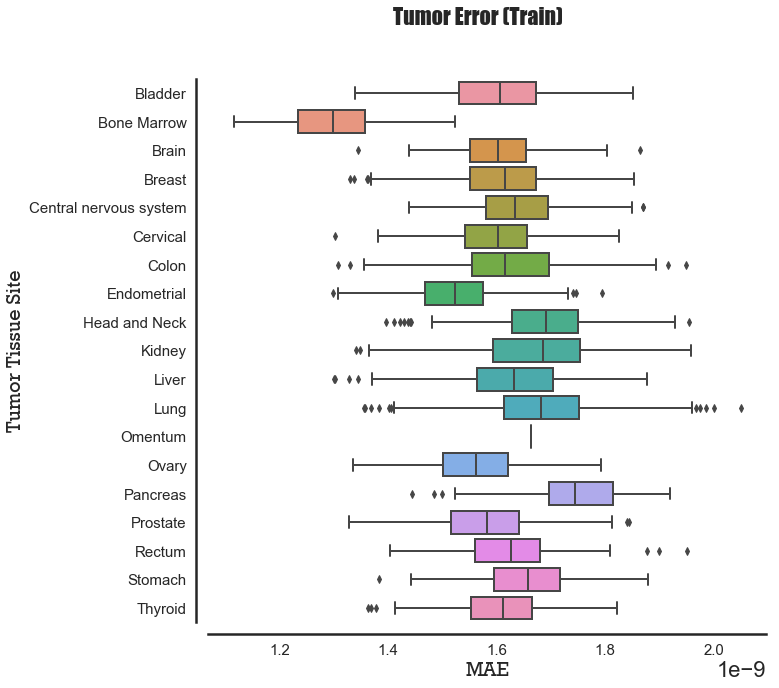

In [0]:
f, ax = plt.subplots(figsize=(10, 10))
sns.set()
sns.set_style("white")
sns.despine(f,offset=12)  
sns.set_palette('colorblind')
sns.set_context("poster",rc={"lines.linewidth": 2.0})
ax = sns.boxplot(x='MAE', y='tumor_tissue_site', data=error_train,order=tumor_tissue_site)
##De esta manera controlamos tamaño de los números en los ejes
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.xlabel("MAE",**rfont,size=20)
plt.ylabel("Tumor Tissue Site",**rfont,size=20)
f.suptitle("Tumor Error (Train)",**ifont,size=22)
plt.savefig("Tumor_tissue_site(train).png")

### Test

In [0]:
hipathia_test.head(2)

,P-hsa03320-37,P-hsa03320-61,P-hsa03320-46,P-hsa03320-57,P-hsa03320-64,P-hsa03320-47,P-hsa03320-65,P-hsa03320-55,P-hsa03320-56,P-hsa03320-33,...,P-hsa05321-94,P-hsa05321-95,P-hsa05321-122,P-hsa05321-123,P-hsa05321-55,P-hsa05321-74,P-hsa05321-81,P-hsa05321-138,P-hsa05321-75,P-hsa05321-152
sample_name,,,,,,,,,,,,,,,,,,,,,
TCGA-13-0885-01A-02R-1569-13,0.000000,0.125569,0.008167,0.008167,0.000000,0.178081,0.098712,0.251691,0.131359,0.000000,...,0.000000,0.186537,0.000000,0.000989,0.000000,0.000000,0.000000,0.010065,0.00000,0.143399
TCGA-EL-A3ZT-11A-13R-A23N-07,0.085601,0.108508,0.000000,0.000000,0.051927,0.142859,0.145116,0.273235,0.132572,0.015052,...,0.000085,0.160161,0.002369,0.003450,0.028416,0.000278,0.000112,0.002118,0.00019,0.065446


In [0]:
indice_hipathia_test = list(hipathia_test.index)
indice_test = [x[:12] for x in indice_hipathia_test]
len(indice_test)

1109

In [0]:
errores_val=[]
for i in range(1109):
    errores_val.append(mean_absolute_error(hipathia_test.iloc[i,:],X_val_pred.iloc[i,:]))

In [0]:
X_val_err= pd.DataFrame(errores_val,columns=['MAE'])
X_val_err.index = indice_test
error_val = pd.merge(X_val_err, whole_hipathia, left_index=True, right_index=True, how='left')
error_val.head(2)

,MAE,bcr_patient_barcode,additional_studies,tumor_tissue_site,histological_type,other_dx,gender,vital_status,days_to_birth,days_to_last_known_alive,...,V536,V538,V542,V545,V546,V547,V553,V554,V561,V573
TCGA-02-2485,1.575460e-09,TCGA-02-2485,None,Brain,Untreated primary (de novo) GBM,None,MALE,Alive,-19494,None,...,None,None,None,None,None,None,None,None,None,None
TCGA-04-1331,1.433024e-09,TCGA-04-1331,None,Ovary,Serous Cystadenocarcinoma,None,FEMALE,Dead,-28848,None,...,None,None,None,None,None,None,None,None,None,None


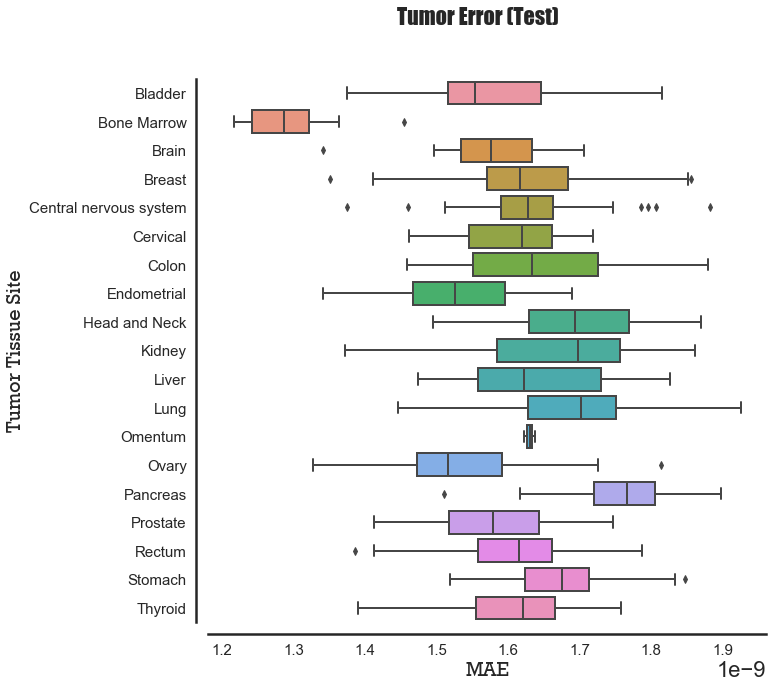

In [0]:
f, ax2 = plt.subplots(figsize=(10, 10))
sns.set()
sns.set_style("white")
sns.despine(f,offset=12)  
sns.set_palette('colorblind')
sns.set_context("poster",rc={"lines.linewidth": 2.0})
ax2 = sns.boxplot(x='MAE', y='tumor_tissue_site', data=error_val,order=tumor_tissue_site)
##De esta manera controlamos tamaño de los números en los ejes
ax2.tick_params(axis="x", labelsize=15)
ax2.tick_params(axis="y", labelsize=15)
plt.xlabel("MAE",**rfont,size=20)
plt.ylabel("Tumor Tissue Site",**rfont,size=20)
f.suptitle("Tumor Error (Test)",**ifont,size=22)
plt.savefig("Tumor_tissue_site(TEST).png")

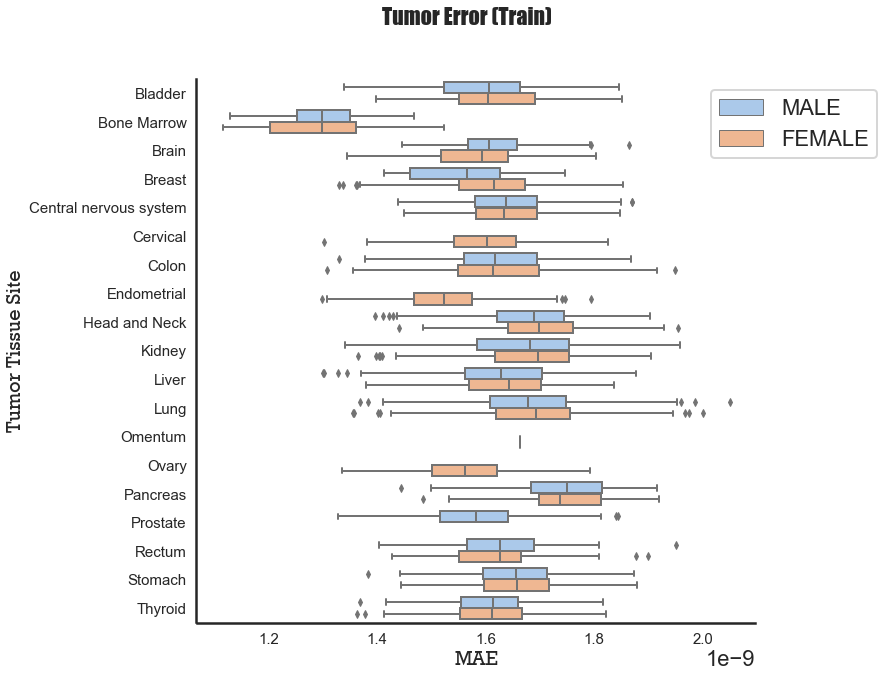

In [0]:
f, ax2 = plt.subplots(figsize=(10, 10))
sns.set()
sns.set_style("white")
sns.despine(f,offset=1)  
sns.set_palette('pastel')
sns.set_context("poster",rc={"lines.linewidth": 2.0})
sns.boxplot(x='MAE', y='tumor_tissue_site',hue="gender", data=error_train,ax=ax2,order=tumor_tissue_site)
##De esta manera controlamos tamaño de los números en los ejes
ax2.tick_params(axis="x", labelsize=15)
ax2.tick_params(axis="y", labelsize=15)
plt.xlabel("MAE",**rfont,size=20)
plt.ylabel("Tumor Tissue Site",**rfont,size=20)
plt.legend(bbox_to_anchor=(0.9, 1.0), loc='best')
f.suptitle("Tumor Error (Train)",**ifont,size=22)
plt.savefig("Tumor_tissue_site(Train).png")

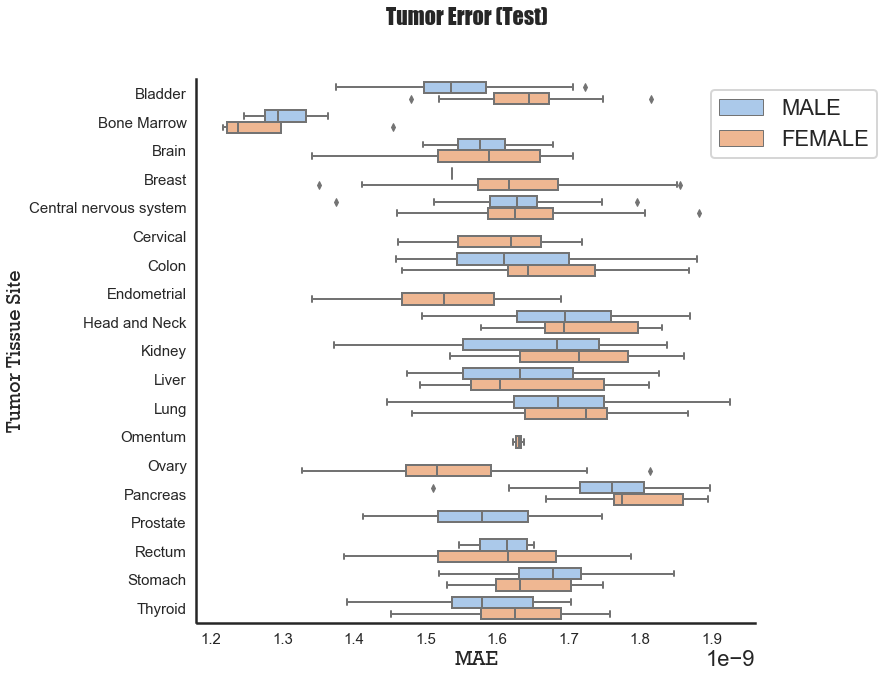

In [0]:
f, ax2 = plt.subplots(figsize=(10, 10))
sns.set()
sns.set_style("white")
sns.despine(f,offset=1)  
sns.set_palette('pastel')
sns.set_context("poster",rc={"lines.linewidth": 2.0})
sns.boxplot(x='MAE', y='tumor_tissue_site',hue="gender", data=error_val,ax=ax2,order=tumor_tissue_site)
##De esta manera controlamos tamaño de los números en los ejes
ax2.tick_params(axis="x", labelsize=15)
ax2.tick_params(axis="y", labelsize=15)
plt.xlabel("MAE",**rfont,size=20)
plt.ylabel("Tumor Tissue Site",**rfont,size=20)
plt.legend(bbox_to_anchor=(0.9, 1.0), loc='best')
f.suptitle("Tumor Error (Test)",**ifont,size=22)
plt.savefig("Tumor_tissue_site(test).png")

### Error por subtipo de tumor molecular cáncer de mama

Obtenemos los subtipos de tumor de cáncer de mama a partir del datset clinical data.

In [0]:
clinical = pd.read_csv('Datos\clinicaldata.csv', index_col=0, sep=",")

clinical.head(2)

,PATIENT_ID,AGE,AJCC.STAGE,CN.CLUSTERS,CNA,CONVERTED.STAGE,ER.STATUS,GENDER,HER2.FINAL.STATUS,INTEGRATED.CLUSTERS..NO.EXP.,...,OS.MONTHS,OS.STATUS,PAM50.SUBTYPE,PR.STATUS,RPPA.CLUSTERS,SIGCLUST.INTRINSIC.MRNA,SIGCLUST.UNSUPERVISED.MRNA,SURVIVAL.DATA.FORM,TUMOR,TUMOR..T1.CODED
SAMPLE.ID,,,,,,,,,,,,,,,,,,,,,
TCGA-A1-A0SD-01,TCGA-A1-A0SD,59,Stage IIA,2.0,0.247,Stage IIA,Positive,FEMALE,Negative,NaN,...,14.4,LIVING,Luminal A,Positive,NaN,-9,-3,enrollment,T2,T_Other
TCGA-A1-A0SE-01,TCGA-A1-A0SE,56,Stage I,2.0,0.213,Stage I,Positive,FEMALE,Negative,NaN,...,43.4,LIVING,Luminal A,Positive,NaN,-5,-7,enrollment,T1,T1


In [0]:
indice_sub = list(clinical.index)
indice_sub = [x[:12] for x in indice_sub]
clinical.index=indice_sub

In [0]:
clinical.head(2)

,PATIENT_ID,AGE,AJCC.STAGE,CN.CLUSTERS,CNA,CONVERTED.STAGE,ER.STATUS,GENDER,HER2.FINAL.STATUS,INTEGRATED.CLUSTERS..NO.EXP.,...,OS.MONTHS,OS.STATUS,PAM50.SUBTYPE,PR.STATUS,RPPA.CLUSTERS,SIGCLUST.INTRINSIC.MRNA,SIGCLUST.UNSUPERVISED.MRNA,SURVIVAL.DATA.FORM,TUMOR,TUMOR..T1.CODED
TCGA-A1-A0SD,TCGA-A1-A0SD,59,Stage IIA,2.0,0.247,Stage IIA,Positive,FEMALE,Negative,NaN,...,14.4,LIVING,Luminal A,Positive,NaN,-9,-3,enrollment,T2,T_Other
TCGA-A1-A0SE,TCGA-A1-A0SE,56,Stage I,2.0,0.213,Stage I,Positive,FEMALE,Negative,NaN,...,43.4,LIVING,Luminal A,Positive,NaN,-5,-7,enrollment,T1,T1


### Train

In [0]:
error_train_sub = pd.merge(error_train, clinical, left_index=True, right_index=True, how='left')
error_train_sub.head(2)

,MAE,bcr_patient_barcode,additional_studies,tumor_tissue_site,histological_type,other_dx,gender,vital_status,days_to_birth,days_to_last_known_alive,...,OS.MONTHS,OS.STATUS,PAM50.SUBTYPE,PR.STATUS,RPPA.CLUSTERS,SIGCLUST.INTRINSIC.MRNA,SIGCLUST.UNSUPERVISED.MRNA,SURVIVAL.DATA.FORM,TUMOR,TUMOR..T1.CODED
TCGA-02-0047,1.743391e-09,TCGA-02-0047,None,Brain,Untreated primary (de novo) GBM,None,MALE,Dead,-28759,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-02-0055,1.644206e-09,TCGA-02-0055,None,Brain,Untreated primary (de novo) GBM,None,FEMALE,Dead,-22798,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0.98, 'Error clasificación molecular (Train)')

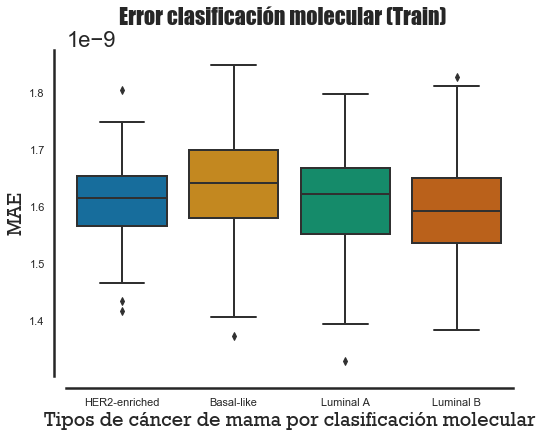

In [0]:
f, ax = plt.subplots(figsize=(8,6))
sns.set()
sns.set_style("white")
sns.despine(f,offset=12)  
sns.set_palette('colorblind')
sns.set_context("poster",rc={"lines.linewidth": 2.0})
g = sns.boxplot(x='PAM50.SUBTYPE', y='MAE', data=error_train_sub,order = ['HER2-enriched','Basal-like','Luminal A','Luminal B'])
plt.xlabel("Tipos de cáncer de mama por clasificación molecular",**rfont,size=20)
plt.ylabel("MAE",**rfont,size=20)
f.suptitle("Error clasificación molecular (Train)",**ifont,size=22)

### Test

In [0]:
error_val_sub = pd.merge(error_val, clinical, left_index=True, right_index=True, how='left')
error_val_sub.head(2)

,MAE,bcr_patient_barcode,additional_studies,tumor_tissue_site,histological_type,other_dx,gender,vital_status,days_to_birth,days_to_last_known_alive,...,OS.MONTHS,OS.STATUS,PAM50.SUBTYPE,PR.STATUS,RPPA.CLUSTERS,SIGCLUST.INTRINSIC.MRNA,SIGCLUST.UNSUPERVISED.MRNA,SURVIVAL.DATA.FORM,TUMOR,TUMOR..T1.CODED
TCGA-02-2485,1.575460e-09,TCGA-02-2485,None,Brain,Untreated primary (de novo) GBM,None,MALE,Alive,-19494,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-04-1331,1.433024e-09,TCGA-04-1331,None,Ovary,Serous Cystadenocarcinoma,None,FEMALE,Dead,-28848,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
error_val_sub.shape

(1109, 514)

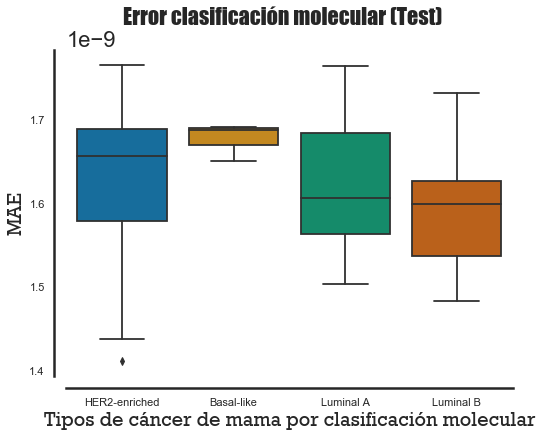

In [0]:
f, ax = plt.subplots(figsize=(8,6))
sns.set()
sns.set_style("white")
sns.despine(f,offset=12)  
sns.set_palette('colorblind')
sns.set_context("poster",rc={"lines.linewidth": 1.8})
ax1 = sns.boxplot(x='PAM50.SUBTYPE', y='MAE', data=error_val_sub,order = ['HER2-enriched','Basal-like','Luminal A','Luminal B'])
plt.xlabel("Tipos de cáncer de mama por clasificación molecular",**rfont,size=20)
plt.ylabel("MAE",**rfont,size=20)
f.suptitle("Error clasificación molecular (Test)",**ifont,size=22)
plt.savefig("Error por subtipo test.png")

### ¿Que nodo representa mejor el sexo? 

Estudiamos los nodos del espacio latente para ver si alguno es capaz de diferenciar entre sexos.

Para este paso realizaremos un test estadístico. El objetivo es algún nodo del encoder discrimina el sexo de los pacientes.

-- 1) Determinar H1 -> El encoder consigue distinguir entre sexos. <br>
-- 2) Definir H0 -> El encoder no distingue entre sexos. <br>
-- 3) Elección de test -> Paramétrico - Distribuciones normales y varianzas similares - Wilkoxon suma de rangos <br>
-- 4) Nivel de significación -> 5%

Hay que tener en cuenta que a raíz del tamaño de la muestra, el test puede decirnos que existen diferencias aunque estas sean inapreciables. Usaremos un estimador del tamaño del efecto -> d de Cohen

In [0]:
encoded_hipathia_sex = encoded_hipathia.copy()
encoded_hipathia_sex.index= indice_tsn
whole_hipathia_gender = whole_hipathia['gender']
encoded_sex = pd.merge(encoded_hipathia_sex, whole_hipathia_gender, right_index=True,left_index=True)

In [0]:
encoded_sex.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,...,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000
mean,1.122389,1.457341,1.410833,1.147793,0.896021,1.198540,0.931319,0.925184,0.879480,1.204384,...,1.436498,0.899760,1.533299,1.365033,1.239499,1.138640,1.631208,1.735542,1.225987,1.405473
std,1.335441,1.648676,1.505368,1.302156,1.192665,1.409050,1.174851,1.298030,1.294757,1.388438,...,1.490646,1.322858,1.550771,1.589302,1.233687,1.256430,1.717394,1.533037,1.237299,1.491928
min,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
25%,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.244680,-0.000000,-0.000000
50%,0.370890,0.836880,1.015977,0.660457,0.238366,0.522788,0.354565,0.141284,0.148250,0.709361,...,1.000355,0.139268,1.192362,0.876256,1.113061,0.774517,1.130468,1.544527,1.033891,0.976470
75%,2.196431,2.631315,2.455811,2.132306,1.574390,2.301661,1.675632,1.614000,1.417614,2.109724,...,2.708667,1.459749,2.579462,2.164201,2.299977,2.043681,2.831186,2.784978,2.280728,2.433063
max,6.201446,8.184736,7.174997,6.242782,6.919374,6.179666,6.614236,8.048565,8.153017,7.964774,...,6.656652,7.766178,8.072207,9.732067,5.418199,6.310220,8.823008,9.379557,5.125464,7.274747


Hay que tener en cuenta en nº de nodo cada vez que ejecutemos el código, ya que será diferente y habrá que cambiarlo para futuras visualizaciones.

In [0]:
from scipy.stats import ttest_ind
from scipy.stats import ranksums
encoded_sex_male = encoded_sex[encoded_sex['gender']=='MALE']
encoded_sex_female = encoded_sex[encoded_sex['gender']=='FEMALE']
##Creamos el test
resultados_test = []
for i in range(100):
    resultados_test.append(ranksums(np.array(encoded_sex_male.iloc[:,i]), np.array(encoded_sex_female.iloc[:,i])))
resultados = pd.DataFrame(resultados_test,columns=["statistic","p-value"])
resultados.sort_values(by=['statistic','p-value'],ascending=False).head(3)

,statistic,p-value
75,25.697197,1.256316e-145
51,25.426659,1.279478e-142
24,20.004563,5.025751e-89


In [0]:
def CohenEffectSize(group1, group2):
    """Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [0]:
resultados_cohen = []
resultados_cohen.append(CohenEffectSize(encoded_sex_male.iloc[:,88], encoded_sex_female.iloc[:,33]))
print('Tendríamos un efecto medio {}'.format(resultados_cohen))

Tendríamos un efecto medio [0.05868102486254054]


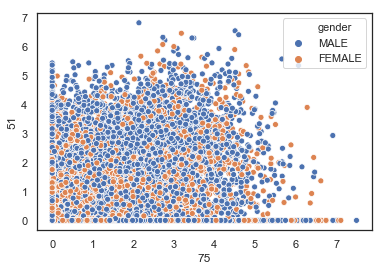

In [0]:
sns.set()
sns.set_style("white")
sns.despine(f,offset=1)  
sns.scatterplot(x=encoded_sex.iloc[:,75], y=encoded_sex.iloc[:,51],
                hue="gender",
                data=encoded_sex)

Text(0.5, 0, 'Sexo')

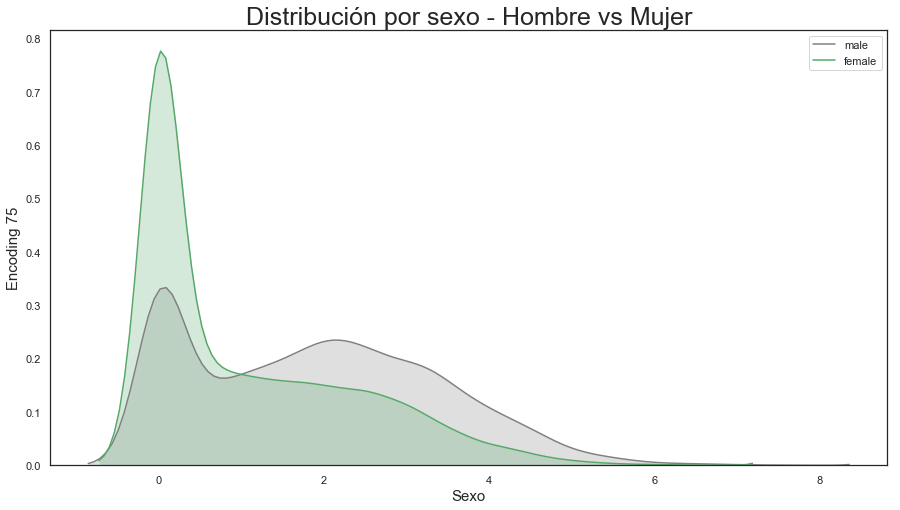

In [0]:
fig = plt.figure(figsize=(15,8),)
sns.set()
sns.set_style("white")
sns.despine(f,offset=1) 
ax=sns.kdeplot(encoded_sex_male.iloc[:,75] , 
               color='gray',
               shade=True,
               label='male')
ax=sns.kdeplot(encoded_sex_female.iloc[:,51] , 
               color='g',
               shade=True, 
               label='female')
plt.title('Distribución por sexo - Hombre vs Mujer', fontsize = 25)
plt.ylabel("Encoding 75", fontsize = 15)
plt.xlabel("Sexo", fontsize = 15)

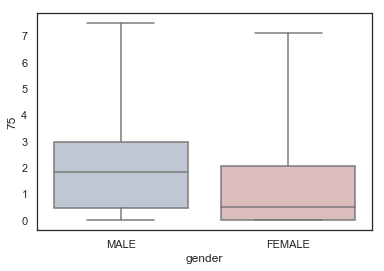

In [0]:
sns.set()
sns.set_style("white")
sns.despine(f,offset=1) 
sns.boxplot(x=encoded_sex['gender'], y=encoded_sex.iloc[:,75],
            whis="range", palette="vlag")